# Modelo de clasificación de especies Iris

**Objetivos:**

- Entrenar un modelo de clasificación para predecir especies de flores en el
dataset Iris.

- Visualizar los datos y los resultados de la clasificación.
- Evaluar el rendimiento del modelo usando la métrica de precisión.

**Tecnologías:**

[![techs](https://skills.syvixor.com/api/icons?i=googlecolaboratory,python,numpy,pandas,matplotlib,scikitlearn,seaborn&perline=8&radius=40)](https://github.com/syvixor/skills-icons)

**Integrantes:**

- Jesús Domínguez [@bluefeatherdev](https://github.com/bluefeatherdev)

- Frank Echeverría [@FranckEP](https://github.com/FranckEP)
- María Arciniegas [@CamilaPua](https://github.com/CamilaPua)
- Josué Salcedo [@j0suesv](https://github.com/j0suesv)

 > Made with '\u{2665}' (♥)

## Importación de Librerías

Librerías para manipular los datos, construir el modelo de clasificación y graficar los resultados.  

- `seaborn` y `matplotlib` para la visualización.

- `pandas` para manipular los datos.  
- De `sklearn`, utiliza `load_iris`, `train_test_split`, `LogisticRegression` y `accuracy_score` para trabajar con los datos y construir el modelo.

In [1]:
# Importar librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Cargar los datos

Cargaremos el dataset Iris, que contiene cuatro características de las flores (longitud y ancho
del sépalo, longitud y ancho del pétalo) y las etiquetas de la especie de flor (Iris-setosa,
Irisversicolor, Iris-virginica). Para este ejercicio, utilizarémos solo las dos primeras características
del dataset (longitud y ancho del sépalo).  

- Usa el dataset proporcionado por `load_iris` de `scikit-learn`.

- Extrae las dos primeras características del conjunto de datos.  
- Extrae las etiquetas que indican la especie de cada flor.  

In [2]:
# Crear DataFrame de load_iris
iris = load_iris()

# Crear un DataFrame de pandas con todas las características y las etiquetas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Extraer las dos primeras características (longitud y ancho del sépalo) para el modelo
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]

# Extraer las etiquetas de las especies para el modelo
y = iris_df['species']

# Mostrar DataFrame de load_iris
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Dividir el conjunto de datos

Debes dividir el conjunto de datos en dos partes:  

- Conjunto de entrenamiento (70%): Para entrenar el modelo.  

- Conjunto de prueba (30%): Para evaluar el modelo.
- Usa la función `train_test_split` para dividir el conjunto de datos.  

In [3]:
# Dividimos datos para pruebas y entrenamientos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Crear el modelo de clasificación

Vamos a usar el algoritmo de Regresión Logística para realizar la clasificación de las especies de flores.  

- Crea el modelo de clasificación utilizando la clase `LogisticRegression` de `scikit-learn`.

In [4]:
# Creamos el modelo de clasificación
model = LogisticRegression()
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Entrenar el modelo

Entrena el modelo con los datos de entrenamiento:

- Utiliza el conjunto de datos de entrenamiento para entrenar el modelo.

In [5]:
# Entrenamos el modelo
model.fit(X_train, y_train)
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Hacer predicciones

Utiliza el modelo entrenado para hacer predicciones sobre el conjunto de datos de prueba:

- Usa el modelo para predecir las especies de flores del conjunto de prueba.

In [6]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

## Calcular la precisión

Evalúa el rendimiento del modelo calculando la precisión, que es la proporción de predicciones
correctas:

- Utiliza la función `accuracy_score` para calcular la precisión del modelo.

- Imprime el valor de precisión.

In [7]:
# Evaluamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 82.22%


## Visualización de los resultados

Visualiza los resultados utilizando `seaborn` y `matplotlib`. Crearás un gráfico de dispersión que
compare las especies reales con las predichas por el modelo:

- Crea un gráfico de dispersión donde las especies reales se representen con diferentes colores.

- Añade otro gráfico de dispersión que muestre las predicciones del modelo.
- Asegúrate de etiquetar adecuadamente los ejes y el título del gráfico.

In [8]:
# Crear un DataFrame para la visualización con los datos de prueba
test_results_df = X_test.copy()
test_results_df['real_species'] = y_test
test_results_df['predicted_species'] = y_pred

# Mapear los números de especie a nombres para mejor lectura
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
test_results_df['real_species_name'] = test_results_df['real_species'].map(species_names)
test_results_df['predicted_species_name'] = test_results_df['predicted_species'].map(species_names)

test_results_df.head(10)

,sepal length (cm),sepal width (cm),real_species,predicted_species,real_species_name,predicted_species_name
73,6.1,2.8,1,1,versicolor,versicolor
18,5.7,3.8,0,0,setosa,setosa
118,7.7,2.6,2,2,virginica,virginica
78,6.0,2.9,1,1,versicolor,versicolor
76,6.8,2.8,1,2,versicolor,virginica
31,5.4,3.4,0,0,setosa,setosa
64,5.6,2.9,1,1,versicolor,versicolor
141,6.9,3.1,2,2,virginica,virginica
68,6.2,2.2,1,1,versicolor,versicolor
82,5.8,2.7,1,1,versicolor,versicolor


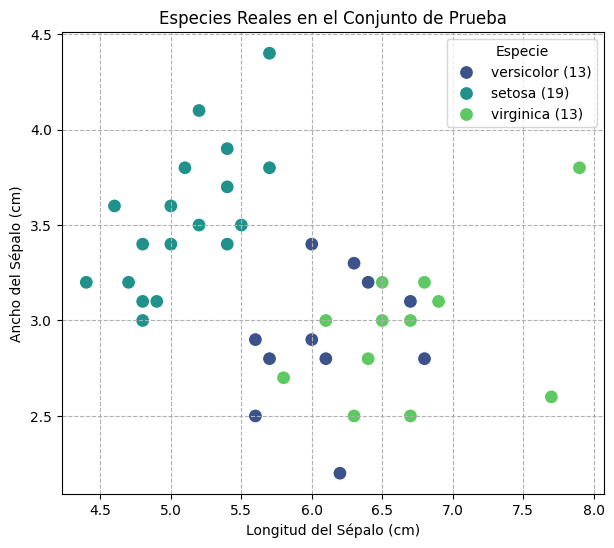

In [9]:
# Calcular el conteo de cada especie real en el conjunto de prueba
real_species_counts = test_results_df['real_species_name'].value_counts().sort_index()

# Gráfico de especies reales
plt.figure(figsize=(7, 6))
ax = sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='real_species_name', data=test_results_df, palette='viridis', s=100)
plt.title('Especies Reales en el Conjunto de Prueba')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')

# Actualizar las etiquetas de la leyenda con los conteos reales
handles, labels = ax.get_legend_handles_labels()
new_labels = [f'{label} ({real_species_counts[label]})' for label in labels]
ax.legend(handles, new_labels, title='Especie')

plt.grid(axis='both', linestyle='--')
plt.show()

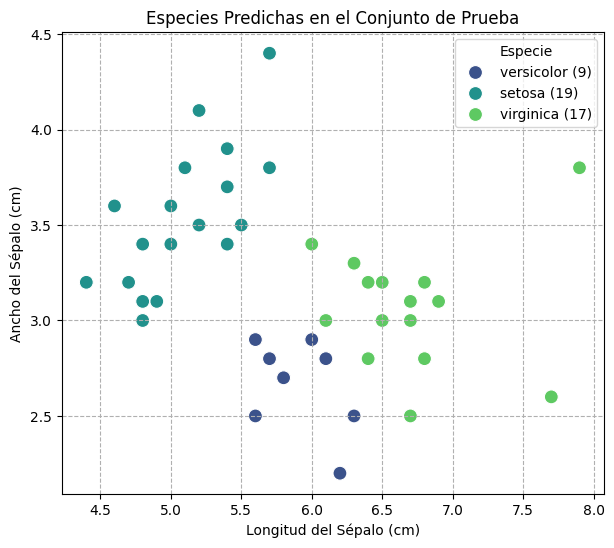

In [10]:
# Calcular el conteo de cada especie predicha en el conjunto de prueba
predicted_species_counts = test_results_df['predicted_species_name'].value_counts().sort_index()

# Gráfico de especies predichas
plt.figure(figsize=(7, 6))
ax = sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='predicted_species_name', data=test_results_df, palette='viridis', s=100)
plt.title('Especies Predichas en el Conjunto de Prueba')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')

# Actualizar las etiquetas de la leyenda con los conteos predichos
handles, labels = ax.get_legend_handles_labels()
new_labels = [f'{label} ({predicted_species_counts[label]})' for label in labels]
ax.legend(handles, new_labels, title='Especie')

plt.grid(axis='both', linestyle='--')
plt.show()

In [11]:
# Verificar si hay puntos superpuestos en el conjunto de prueba
overlapping_points = test_results_df[test_results_df.duplicated(subset=['sepal length (cm)', 'sepal width (cm)'], keep=False)]

if not overlapping_points.empty:
    print("Se encontraron puntos superpuestos en el conjunto de prueba:")
    display(overlapping_points.sort_values(by=['sepal length (cm)', 'sepal width (cm)']))
else:
    print("No se encontraron puntos superpuestos exactos en el conjunto de prueba.")

Se encontraron puntos superpuestos en el conjunto de prueba:


,sepal length (cm),sepal width (cm),real_species,predicted_species,real_species_name,predicted_species_name
12,4.8,3.0,0,0,setosa,setosa
45,4.8,3.0,0,0,setosa,setosa
82,5.8,2.7,1,1,versicolor,versicolor
142,5.8,2.7,2,1,virginica,versicolor
132,6.4,2.8,2,2,virginica,virginica
128,6.4,2.8,2,2,virginica,virginica
65,6.7,3.1,1,2,versicolor,virginica
86,6.7,3.1,1,2,versicolor,virginica


## Resultados esperados

Al completar este laboratorio, deberías haber creado un modelo de clasificación para predecir
las especies de flores Iris utilizando Regresión Logística, evaluado su precisión, y visualizado los
resultados de manera clara.

## Conclusiones

- En este laboratorio, hemos desarrollado y evaluado un modelo de clasificación utilizando Regresión Logística para predecir las especies de flores en el dataset Iris, basándonos únicamente en la longitud y el ancho del sépalo.

- Hemos logrado una precisión del **82.22%** en el conjunto de prueba, lo que indica que el modelo es capaz de clasificar correctamente la mayoría de las instancias con las características seleccionadas.

- La visualización de los resultados mediante gráficos de dispersión nos permitió comparar las especies reales con las predichas por el modelo. Observamos una alta similitud entre ambos gráficos, lo cual es coherente con la precisión obtenida.

- Para futuras mejoras, se podría considerar la inclusión de las características del pétalo para entrenar el modelo, lo cual probablemente aumentaría la precisión de la clasificación, dado que estas características suelen ser más discriminatorias entre las especies de Iris. También se podrían explorar otros algoritmos de clasificación para comparar su rendimiento.

> **Sobre los puntos superpuestos:**
>
> Un punto interesante que notamos durante la visualización fue la presencia de puntos superpuestos en el gráfico de dispersión del conjunto de prueba. Esto ocurre cuando múltiples flores tienen exactamente los mismos valores para la longitud y el ancho del sépalo.
>
> Aunque visualmente parezcan un solo punto, el conteo en la leyenda refleja con precisión el número total de instancias en el conjunto de prueba, incluyendo aquellos puntos que se superponen.
>
> Esta observación resalta cómo la visualización puede a veces simplificar la densidad de los datos, y cómo es importante respaldar las observaciones visuales con análisis de datos directos.

 > Made with '\u{2665}' (♥)